# DOMAIN: Smartphone, Electronics

 CONTEXT: India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system
based on individual consumer’s behaviour or choice.

PROJECT OBJECTIVE: We will build a recommendation system using popularity based and collaborative filtering methods to recommend
mobile phones to a user which are most popular and personalised respectively.

# Steps and tasks

# 1. Import the necessary libraries and read the provided CSVs as a data frame.

In [1]:
# Importing necessary libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds
import gc
%matplotlib inline

# Surprise package for making recommendation
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise.model_selection import GridSearchCV, cross_validate, KFold
from surprise import accuracy, Reader, Dataset, dump
from surprise import SVD

# For Sklearn NearestNeighbor based recommendation
from sklearn.metrics import pairwise_distances, mean_squared_error
from scipy.spatial.distance import correlation, cosine
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import sklearn.metrics as metrics
from math import sqrt

# Display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 20
pd.options.display.float_format = "{:.2f}".format

random_state = 2019
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

In [2]:
# read the provided CSVs
r1 = pd.read_csv('phone_user_review_file_1.csv',encoding='iso-8859-1')
r1.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.00,10.00,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.00,10.00,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8


In [3]:
rows,columns = r1.shape
print("The number of rows:",rows)
print("The number of columns:",columns)

The number of rows: 374910
The number of columns: 11


In [4]:
r2 = pd.read_csv('phone_user_review_file_2.csv',encoding='iso-8859-1')
r2.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.00,10.00,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.00,10.00,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [5]:
rows,columns = r2.shape
print("The number of rows:",rows)
print("The number of columns:",columns)

The number of rows: 114925
The number of columns: 11


In [6]:
r3 = pd.read_csv('phone_user_review_file_3.csv',encoding='iso-8859-1')
r3.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.00,10.00,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.00,10.00,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...


In [7]:
rows,columns = r3.shape
print("The number of rows:",rows)
print("The number of columns:",columns)

The number of rows: 312961
The number of columns: 11


In [8]:
r4 = pd.read_csv('phone_user_review_file_4.csv',encoding='iso-8859-1')
r4.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.00,10.00,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.00,10.00,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black


In [9]:
rows,columns = r4.shape
print("The number of rows:",rows)
print("The number of columns:",columns)

The number of rows: 98284
The number of columns: 11


In [10]:
r5 = pd.read_csv('phone_user_review_file_5.csv',encoding='iso-8859-1')
r5.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.00,10.00,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.00,10.00,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616


In [11]:
rows,columns = r5.shape
print("The number of rows:",rows)
print("The number of columns:",columns)

The number of rows: 350216
The number of columns: 11


In [12]:
r6 = pd.read_csv('phone_user_review_file_6.csv',encoding='iso-8859-1')
r6.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.00,10.00,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.00,10.00,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct


In [13]:
rows,columns = r6.shape
print("The number of rows:",rows)
print("The number of columns:",columns)

The number of rows: 163837
The number of columns: 11


# Merge the provided CSVs into one data-frame.

In [14]:
r_df = pd.concat([r1,r2,r3,r4,r5,r6],axis=0)
r_df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.00,10.00,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.00,10.00,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.00,10.00,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.20,10.00,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.00,10.00,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


# Check a few observations and shape of the data-frame

In [15]:
rows,columns = r_df.shape
print("The number of rows in the final review dataframe:",rows)
print("The number of columns in the final review dataframe:",columns)

The number of rows in the final review dataframe: 1415133
The number of columns in the final review dataframe: 11


In [16]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


Except score and score_max (which are of float type) all other features are of object type
feature date should be of datetype
Also, score, score_max, extract and author: columns seems to have Null values

In [17]:
r_df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.00,8.01,2.62,0.20,7.20,9.20,10.00,10.00
score_max,1351644.00,10.00,0.00,10.00,10.00,10.00,10.00,10.00


except 'score' and 'score_max' all other attribute's datatypes are object type.

# Check for missing values. Impute the missing values if there is any.

In [18]:
# checking for null-values
r_df.isnull().values.any()

True

In [19]:
r_df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [20]:
# Imputing null-values with central value
r_df = r_df.fillna(r_df.median())

In [21]:
r_df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63202
product          1
dtype: int64

After imputing with null values with the median values; still missing values are present. Let us drop the null values in the 'extract','author' and 'product' column. 

In [22]:
# dropping null-values
r_df = r_df.dropna()

In [23]:
# checking for null values if any
r_df.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

# Round off scores to the nearest integers.

In [24]:
r_df['score'] = r_df['score'].astype(int)
r_df['score_max'] = r_df['score_max'].astype(int)

In [25]:
r_df.shape

(1336416, 11)

In [26]:
r_df1 = r_df.copy()

# Check for duplicate values and remove them if there is any.

In [27]:
r_df = r_df.drop_duplicates()

In [28]:
r_df2 = r_df.copy()

# Keep only 1000000 data samples. Use random state=612.

In [29]:
df = r_df.sample(n=1000000, random_state=612)

In [30]:
df.shape
print(f'''The final dataframe has {df.shape[0]} rows and {df.shape[1]} columns''')

The final dataframe has 1000000 rows and 11 columns


# Drop irrelevant features. Keep features like Author, Product, and Score.

In [31]:
df.head(2).T

,104246,78693
phone_url,/cellphones/samsung-galaxy-s-i9000/,/cellphones/blu-win-jr/
date,1/30/2011,10/28/2015
lang,en,en
country,us,in
source,Amazon,Amazon
domain,amazon.com,amazon.in
score,10,10
score_max,10,10
extract,"After shopping around, I decided to go with th...",Got it for 2999. My friend is using except cam...
author,Paul B,Yuvraj


In [32]:
df.drop(['phone_url','date','lang','country','source','domain','score_max','extract'],axis=1,inplace=True)

In [33]:
df.head()

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
109329,10,Pankaj Bhalla,"Lenovo P780 (Deep Black, 4GB)"
64164,6,Bgrazina,Samsung Galaxy XCover 2
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."


# 2. Answer the following questions

# Identify the most rated features

In [34]:
print('Most rated features/products: \n\n',df['product'].value_counts().head())

Most rated features/products: 

 Lenovo Vibe K4 Note (White,16GB)     3908
Lenovo Vibe K4 Note (Black, 16GB)    3234
OnePlus 3 (Graphite, 64 GB)          3128
OnePlus 3 (Soft Gold, 64 GB)         2643
Huawei P8lite zwart / 16 GB          1994
Name: product, dtype: int64


In [35]:
#sorting on products that got highest mean score
df.groupby('product')['score'].mean().sort_values(ascending=False)

product
Nokia 5310 Xpress Music, sakura red sim-free unbranded kein Vertrag   10.00
Oppo Find 5 X909 16 Gb White Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½                         10.00
Sony Ericsson W880i Prepay Mobile Phone On Orange                     10.00
Huawei Mobiltelefoner Mate 8 Dual SIM 32GB                            10.00
Huawei NOVA 4G MYSTIC SILVER                                          10.00
                                                                       ... 
Hewlett-Packard HP iPAQ rw6828                                         1.00
LG TP 5250                                                             1.00
BlackBerry Curve 8530 - Sprint                                         1.00
LG Google Nexus 5X (32GB, quartz)                                      1.00
Sony Ericsson j120i                                                    0.00
Name: score, Length: 56030, dtype: float64

In [36]:
df[df['score']==10]['author'].value_counts().head(10)

Amazon Customer    24385
Cliente Amazon      7629
e-bit               3761
Client d'Amazon     2314
Amazon Kunde        1759
einer Kundin        1575
einem Kunden        1185
unknown              858
Anonymous            686
Anonymous            536
Name: author, dtype: int64

Distribution of number of ratings per item (Clipped at 10): 
 Lenovo Vibe K4 Note (White,16GB)                3908
Lenovo Vibe K4 Note (Black, 16GB)               3234
OnePlus 3 (Graphite, 64 GB)                     3128
OnePlus 3 (Soft Gold, 64 GB)                    2643
Huawei P8lite zwart / 16 GB                     1994
Samsung Galaxy Express I8730                    1990
Lenovo Vibe K5 (Gold, VoLTE update)             1865
Samsung Galaxy S6 zwart / 32 GB                 1729
Lenovo Vibe K5 (Grey, VoLTE update)             1603
Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)    1454
Name: product, dtype: int64


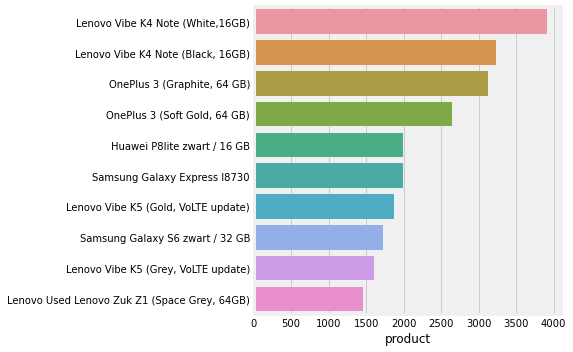

In [37]:
product = df['product'].value_counts()[:10]
print('Distribution of number of ratings per item (Clipped at 10): \n',product)
plt.figure(figsize=(8,5))
sns.barplot(y=product.index,x=product)
plt.tight_layout()
plt.show()

# Identify the users with most number of reviews

Distribution of number of ratings per user(Clipped at 10): 
 Amazon Customer    57765
Cliente Amazon     14564
e-bit               6309
Client d'Amazon     5720
Amazon Kunde        3624
einer Kundin        1963
Anonymous           1939
einem Kunden        1433
unknown             1283
Anonymous           1087
Name: author, dtype: int64


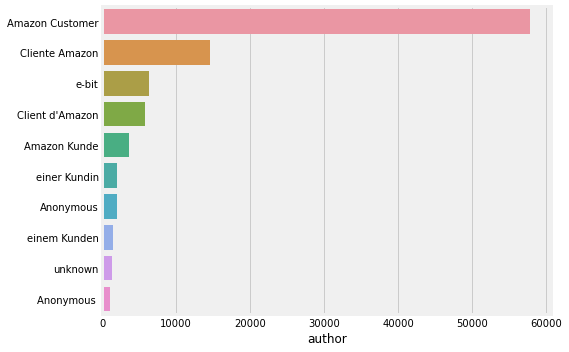

In [38]:
users = df['author'].value_counts(dropna=False)[:10]
print('Distribution of number of ratings per user(Clipped at 10): \n',users)
users.index = users.index.map(str)
plt.figure(figsize=(8,5))
sns.barplot(y=users.index,x=users)
plt.tight_layout()
plt.show()

# Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [39]:
auth = df['author'].value_counts()
auth = auth[auth>50].index.tolist() # list of authors with > 50 ratings
print('Number of authors who have given more than(>)50 rating: ', len(auth))

Number of authors who have given more than(>)50 rating:  679


In [40]:
prod = df['product'].value_counts()
prod = prod[prod>50].index.tolist() # list of products with > 50 ratings
print('Number of products with more than(>) 50 rating: ', len(prod))

Number of products with more than(>) 50 rating:  4346


In [41]:
df_50 = df[(df['author'].isin(auth)) & (df['product'].isin(prod))]
print(f'\ndf_50_50: Rows: {df_50.shape[0]} and Columns: {df_50.shape[1]}\n')
del auth, prod
df_50.head()


df_50_50: Rows: 108983 and Columns: 3



,score,author,product
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
290678,8,sara,"Samsung SM-N910F Galaxy Note 4 Smartphone, 32 ..."
101404,10,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼)
223332,8,Amazon Customer,Motorola Moto G 3rd Generation SIM-Free Smartp...
361379,10,e-bit,Smartphone Motorola Moto G 4 Play XT1603


In [42]:
df_50['author'].unique()[:100]

array(['Sebastian', 'sara', 'Ð\x95Ð²Ð³ÐµÐ½Ð¸Ð¹', 'Amazon Customer',
       'e-bit', "Client d'Amazon", 'Sandy', 'An??nimo', 'Francesco',
       'Luigi', 'Eric', 'Cliente Amazon', 'Maurizio', 'martin',
       'einem Kunden', 'Ð\x93Ð¾Ñ\x81Ñ\x82Ñ\x8c', 'einer Kundin', 'Alex',
       'Christian', 'Anonymous ', 'Amazon customer', 'Cristian', 'Rachel',
       'francesco', 'Ð\x9fÐ°Ð²ÐµÐ»', 'Oks', 'Tommy', 'ozlemce108',
       'Danny', 'Ð\x90Ð»ÐµÐºÑ\x81Ð°Ð½Ð´Ñ\x80', 'iboibo', 'roberto',
       'Rahul', 'Ð\x90Ñ\x80Ñ\x82ÐµÐ¼', 'Ravi', 'Victor', 'Mike', 'marco',
       'Amazon Kunde', 'Oliver', 'Dan', 'miatamania', 'Chris', 'Nicole',
       'James', 'andrea', 'DJ', 'Jeff', 'Michael', 'Laura', 'Samuel',
       'Antonio', 'Ð\x9eÐ»ÐµÐ³', 'david', 'mario', 'Luciano',
       'Ð\x90Ð½Ð°Ñ\x82Ð¾Ð»Ð¸Ð¹', 'Ð\x9cÐ¸Ñ\x85Ð°Ð¸Ð»', 'Rick', 'paolo',
       'Kindle-Kunde', 'unknown', 'Angela', 'Ð\x90Ñ\x80Ñ\x82Ñ\x83Ñ\x80',
       'Giorgio', 'Ð\x90Ð»ÐµÐºÑ\x81ÐµÐ¹', 'Ron', 'Ð\x94Ð°Ñ\x80Ñ\x8cÑ\x8f',
       'Ð\xa0Ð¾Ð¼

In [43]:
df_50['product'].unique()[:100]

array(['Samsung E1190 Handy (3,6 cm (1,43 Zoll) Display, Dual-Band) titan gray',
       'Samsung SM-N910F Galaxy Note 4 Smartphone, 32 GB, Bianco [Italia]',
       'Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼)',
       'Motorola Moto G 3rd Generation SIM-Free Smartphone 2 GB RAM/16 GB ROM',
       'Smartphone Motorola Moto G 4 Play XT1603',
       'Spigen Protection Ã©cran ASUS ZenFone 2, 5.5" (ZE550ML/ZE551ML) en Verre TrempÃ©, Spigen **Easy-Install Kit** [Extreme RÃ©sistant aux rayures] **Ultra Clair** protection verre trempÃ© ASUS ZenFone 2, Protection ASUS ZenFone 2 O01GL20595',
       'Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB)',
       'Apple iPhone SE (Gold, 16GB)',
       'Samsung Galaxy S Duos II GT-S7582 Factory Unlocked Cellphone, International Version, White',
       'Motorola Smartphone Motorola RAZR i Branco - Tela 4.3, Touchscreen, Android 4.0, C??mera de 8MP, 3G, Wi-Fi, Bluetooth, GPS, NFC, Mem??ria Interna 8GB',
       'Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Dis

# 3. Build a popularity based model and recommend top 5 mobile phones.

In [44]:
# calculating the mean score of a product
ratings_mean = pd.DataFrame(df.groupby('product')['score'].mean())

In [45]:
ratings_mean.shape

(56030, 1)

In [46]:
#calculating the mean score for a product by grouping it.
ratings_mean['counts'] = pd.DataFrame(df.groupby('product')['score'].count())
ratings_mean.head()

,score,counts
product,,
"'Smartphone Meizu Pro 5, 5,7 pouces avec Exynos 7420 Octa 8 Core Processeur. mÃ©moire RAM 4 Go et 64 Go mÃ©moire...",8.00,1
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.00,1
"'Sony Xperia X (F5122) â rosa â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.00,1
"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core Android 4.2.2 3G Phone 8MP CAM 512MB RAM 4GB ROM",8.00,1
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",7.35,31


In [47]:
# recommending top 5 mobile phones based on user-rating score.
df_pb = ratings_mean.sort_values(by=['score','counts'],ascending=False)

In [48]:
df_pb.head()

,score,counts
product,,
Samsung Galaxy Note5,10.00,144
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.00,132
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.00,131
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB,10.00,127
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.00,126


Top five mobile phones based on user rating

# 4. Build a collaborative filtering model

In [49]:
df.head()

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
109329,10,Pankaj Bhalla,"Lenovo P780 (Deep Black, 4GB)"
64164,6,Bgrazina,Samsung Galaxy XCover 2
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."


In [50]:
# arranging columns in the order of user id,item id and rating to be fed in the svd
columns_titles = ['author','product','score']
df_cl= df.reindex(columns=columns_titles)
df_cl.head()

,author,product,score
104246,Paul B,Samsung i897 Captivate Android Smartphone Gala...,10
78693,Yuvraj,"Blu Win JR LTE (Grey, 4GB)",10
109329,Pankaj Bhalla,"Lenovo P780 (Deep Black, 4GB)",10
64164,Bgrazina,Samsung Galaxy XCover 2,6
8816,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl...",2


In [51]:
df_cl.shape

(1000000, 3)

# Collaborative filtering model using SVD

In [52]:
# 5000 samples are considered
df_cl_data = df_cl.sample(n=5000,random_state=612)
df_cl_data.head()

,author,product,score
85356,Bill W,Microsoft Lumia 650 UK SIM-Free Smartphone - B...,10
283066,Uwe J.,"LG Electronics G4 Smartphone 14 cm (5,5 Zoll) ...",4
61687,NORMAB0,Motorola KRZR K1,8
61327,yorty22,LG G2 Sprint LS980,10
363928,Mistral,"LG Spirit H420 Smartphone, Bianco [Italia]",10


In [53]:
df_cl_data.shape

(5000, 3)

5000 samples are considered

In [54]:
# Build a collaborative filtering model using SVD. 
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_cl_data,reader = reader)

In [55]:
trainset = data.build_full_trainset()

In [56]:
trainset.ur

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 4.0)],
             2: [(2, 8.0)],
             3: [(3, 10.0)],
             4: [(4, 10.0)],
             5: [(5, 4.0)],
             6: [(6, 6.0)],
             7: [(7, 4.0)],
             8: [(8, 10.0)],
             9: [(9, 10.0)],
             10: [(10, 2.0),
              (15, 2.0),
              (33, 8.0),
              (36, 6.0),
              (43, 10.0),
              (45, 10.0),
              (51, 10.0),
              (65, 2.0),
              (67, 2.0),
              (89, 10.0),
              (61, 6.0),
              (95, 4.0),
              (101, 10.0),
              (109, 2.0),
              (113, 10.0),
              (115, 10.0),
              (117, 4.0),
              (146, 6.0),
              (147, 10.0),
              (177, 2.0),
              (185, 2.0),
              (204, 8.0),
              (215, 2.0),
              (216, 2.0),
              (65, 10.0),
              (275, 10.0),
              (185, 

In [57]:
algo_svd = SVD()
algo_svd.fit(trainset)

In [58]:
testset = trainset.build_anti_testset()

In [59]:
svd_pred = algo_svd.test(testset)

In [60]:
svd_pred

[Prediction(uid='Bill W', iid='LG Electronics G4 Smartphone 14 cm (5,5 Zoll) (Touch-Display, 32 GB Speicher, Android 6) braune Lederversion', r_ui=7.9896, est=8.084654779962614, details={'was_impossible': False}),
 Prediction(uid='Bill W', iid='Motorola KRZR K1', r_ui=7.9896, est=8.287725816174616, details={'was_impossible': False}),
 Prediction(uid='Bill W', iid='LG G2 Sprint LS980', r_ui=7.9896, est=8.522399275164798, details={'was_impossible': False}),
 Prediction(uid='Bill W', iid='LG Spirit H420 Smartphone, Bianco [Italia]', r_ui=7.9896, est=8.300045623187946, details={'was_impossible': False}),
 Prediction(uid='Bill W', iid='GÃ©nÃ©rique Ecran Vitre Tactile WIKO RAINBOW - Noir + outils - NEUF', r_ui=7.9896, est=7.87114974523983, details={'was_impossible': False}),
 Prediction(uid='Bill W', iid='Samsung Galaxy S4 GT-I9500 16GB (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)', r_ui=7.9896, est=8.248955727513215, details={'was_impossible': False}),
 Prediction(uid='Bill W', iid='Samsung Galaxy S5 SM-G900F 1

In [62]:
print("SVD : Test Set")

print('\nRMSE value(SVD, test-set):')                                          # compute RMSE
svd_rmse = accuracy.rmse(svd_pred, verbose=True)

SVD : Test Set

RMSE value(SVD, test-set):
RMSE: 0.3398


# KNN Item based

In [63]:
knn_i = KNNWithMeans(k=10, sim_options={'name': 'pearson_baseline', 'user_based': False})
knn_i.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [64]:
knn_i_pred = knn_i.test(testset)

In [65]:
print('First few prediction values: \n',knn_i_pred[0:2])
print('\nRMSE value(Item-based Model, test-set):') # compute RMSE
knn_i_rmse = round(accuracy.rmse(knn_i_pred),2)

First few prediction values: 
 [Prediction(uid='Bill W', iid='LG Electronics G4 Smartphone 14 cm (5,5 Zoll) (Touch-Display, 32 GB Speicher, Android 6) braune Lederversion', r_ui=7.9896, est=7.0, details={'actual_k': 0, 'was_impossible': False}), Prediction(uid='Bill W', iid='Motorola KRZR K1', r_ui=7.9896, est=9.0, details={'actual_k': 0, 'was_impossible': False})]

RMSE value(Item-based Model, test-set):
RMSE: 2.5214


# KNN User based

In [75]:
knn_u = KNNWithMeans(k=10, sim_options={'name': 'pearson_baseline', 'user_based': True})
knn_u.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [84]:
knn_u_pred = knn_u.test(testset)

The above algorithm is taking very long time and finally displays the message out of memory.

In [ ]:
print('First few prediction values:\n',knn_u_pred[0:2])
print('\nRMSE value(User-based Model,test-set):') # compute RMSE
knn_u_rmse = round(accuracy.rmse(knn_u_pred),2)

# 5. Evaluate the collaborative model. Print RMSE value

<AxesSubplot:>

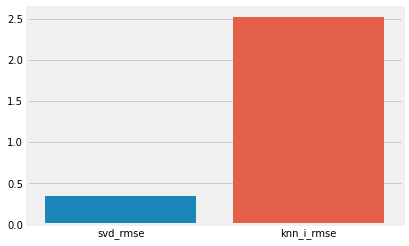

In [66]:
# Comparison of RMSE scores from different collaorative algorithms
sns.barplot(x=['svd_rmse','knn_i_rmse'],y=[svd_rmse,knn_i_rmse])

# 6. Predict score (average rating) for test users

In [69]:
svd_pred_df=pd.DataFrame(svd_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',svd_pred_df['est'].mean())
print('average rating  by test users: ',svd_pred_df['rui'].mean())
print('average prediction error for test users: ',(svd_pred_df['rui']-svd_pred_df['est']).abs().mean())

average prediction for test users:  8.001174859138777
average rating  by test users:  7.98960000200145
average prediction error for test users:  0.2741626302177237


# 7. Report your findings and inferences.

# 8. Try and recommend top 5 products for test users(algorithm used SVD)

In [79]:
from collections import defaultdict

# Objective: To get top_n recommendation for each user
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [83]:
top_5_recommendation = get_top_n(svd_pred,n=5)
# Print the recommended items for each user
for uid, user_ratings in top_5_recommendation.items():
    print(uid, [iid for (iid, _) in user_ratings])

Bill W ['Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'OnePlus X (Onyx, 16GB)', 'Nokia 5530 XpressMusic']
Uwe J. ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 6210', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Mi Xiaomi Mi Max (Gold, 32GB)']
NORMAB0 ['Nokia 6210', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)']
yorty22 ['Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Nokia 6210', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung S5620 Monte']
Mistral ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsun

Client d'Amazon ['Samsung Galaxy Grand Prime', "Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]", 'Protector Pantalla Nokia Lumia 630 635 Vidrio Templado 1 Und', 'Blackberry Curve 8520 Smartphone (QWERTY, Bluetooth, 2MP, Push-Service) [UK-Import] schwarz', 'Nokia E66']
ÐÐ¸Ð»Ð»ÐµÑ ÐÐ°ÑÑ ['Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 6210', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]', 'HTC Desire C']
Emmi ['Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)',

Juri Kubler ['Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Nokia 6210', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]']
sam rose ['Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Motorola Smartphone Motorola Moto G Colors Edition Dual Chip Desbloqueado...', 'Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4G LTE 5 Inch Display 1GB RAM 8GB ROM (AT&T Go Phone No Annual Contract)', 'Samsung Galaxy S7 edge 32GB (Verizon)']
Anonyme ['Samsung Galaxy S7 edge 32GB (Verizon)', 'OnePlus 3 (Soft Gold, 64 GB)', 'Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'Nokia 6210', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)']
Ð Ð°Ð±Ð°Ð´Ð°Ð½Ð¾Ð² ÐÐ°Ð³Ð¾Ð¼ÐµÐ´ÑÐ°ÑÑÐ» ['Samsung Galaxy S7 32GB (T-Mobile)', 'Lenovo VIBE P1m (White, 16 GB)', 'Samsung Galaxy S7 edge 32GB (Verizon)'

Milliso ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Huawei Honor 5X Unlocked Smartphone, 16GB Dark Grey (US Warranty)', 'Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'LG G3 D855 - Smartphone libre Android (pantalla 5.5", cÃ¡mara 13 Mp, 3 GB RAM (32 GB eMMC) ,Quad-Core 2.5 GHz), negro metalizado (importado)']
FlutterFairy ['Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Nokia 5800', 'Nokia 6210']
AleksandrN ['Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'OnePlus X (Onyx, 16GB)', 'Nokia 6210']
Lauren ['Samsung Galaxy S7 32GB (T-Mobile)', 'Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 16GB, Android) weiÃ\x9f', 'Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)

A Mills ['Samsung Galaxy S7 32GB (T-Mobile)', 'Motorola Nexus 6 Unlocked Smartphone, 32 GB, U. S. Warranty - Midnight Blue', 'Nokia 6210', 'Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 16GB, Android) weiÃ\x9f', 'Samsung Galaxy S5 SM-G900F 16GB Factory Unlocked Cellphone International Version, Retail Packaging, Black']
Chil ['Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 7110', 'OnePlus 3 (Soft Gold, 64 GB)', 'HTC Desire C', 'Samsung Galaxy S7 edge 32GB (Verizon)']
Anja ['Samsung Galaxy S6 64 GB UK SIM-Free Smartphone - Gold', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 6210', 'Nokia 5800']
IxDhJFkCepibsvi ['Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 6210', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'OnePlus X (Onyx, 16GB)']
Aashpreet ['Samsung Galaxy S7 edge 32

SILVIA ['Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'iPhone SE 16 GB (rosa guld)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]']
Alfie ['Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 6210', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Nokia 5530 XpressMusic']
MONA2617 ['Nokia N95', 'Nokia 5800', 'Nokia 6210', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Samsung Galaxy S7 32GB (T-Mobile)']
Notafnboy ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'OnePlus 3 (Soft Gold, 64 GB)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero

???????????????? ????????????????? ['Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 6210', 'Nokia 5530 XpressMusic', 'OnePlus X (Onyx, 16GB)', 'LG G3 D855 - Smartphone libre Android (pantalla 5.5", cÃ¡mara 13 Mp, 3 GB RAM (32 GB eMMC) ,Quad-Core 2.5 GHz), negro metalizado (importado)']
Ð ÑÑÐ»Ð°Ð½112312312 ['Nokia 6210', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Huawei Honor 5X Unlocked Smartphone, 16GB Dark Grey (US Warranty)', 'OnePlus 3 (Soft Gold, 64 GB)', 'Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]']
CCa ['Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'OnePlus X (Onyx, 16GB)', 'Lenovo VIBE P1m (White, 16 GB)', 'Nokia 5530 XpressMusic']
sstteellaa ['Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 6210', 'OnePlus X (Onyx, 16GB)', 'Motorola Nexus 6 Unlocked Smartphone, 32 GB, U. S. Warranty - Midnight Blue', 'Samsung Galaxy S7 edge 32GB (Verizon)']
Ð¦ÐµÑ

ya.jendos-h ['Samsung Galaxy S7 32GB (T-Mobile)', 'Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]']
Lado1 ['Nokia 6210', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Samsung Smartphone Samsung Galaxy S4 Desbloqueado Android 4.2 Tela 5" 16GB 4G...', 'Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4G LTE 5 Inch Display 1GB RAM 8GB ROM (AT&T Go Phone No Annual Contract)']
Juan ['Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 6210', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S III 16GB (Straight Talk)', 'Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]']
Dan

Rebustiano ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Nokia 6210', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung SGH-X480', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)']
Vera ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S4', 'OnePlus 3 (Soft Gold, 64 GB)', 'Nokia 6210']
mcin51 ['Nokia 6210', 'Nokia 5530 XpressMusic', 'Huawei Honor 5X Unlocked Smartphone, 16GB Dark Grey (US Warranty)', 'Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]', 'Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)']
Jorge "Jorge A. Orduna" ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Nokia 6210', 'Lenovo VIBE P1m (White, 16 GB)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)']
John ['Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Nokia 5530 XpressMusic', 'Samsung Gal

Alsultan Saad A ['Samsung Galaxy S7 32GB (T-Mobile)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)']
ALEX KWABENA NYAME ['Nokia 6210', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S6 64 GB UK SIM-Free Smartphone - Gold', 'Motorola Nexus 6 Unlocked Smartphone, 32 GB, U. S. Warranty - Midnight Blue']
wgeoff ['Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qual

msTeeTee  ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Motorola Smartphone Motorola Moto G Colors Edition Dual Chip Desbloqueado...', 'Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 16GB, Android) weiÃ\x9f', 'Lenovo VIBE P1m (White, 16 GB)']
christian depuydt ['Nokia 6210', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Nokia 5800']
506fan ['Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4G LTE 5 Inch Display 1GB RAM 8GB ROM (AT&T Go Phone No Annual Contract)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Lenovo VIBE P1m (White, 16 GB)']
tibu619 ['Samsung Galaxy S7 edge 32GB (Ve

rewind10 ['Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'OnePlus X (Onyx, 16GB)', 'Nokia 6210', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)']
a_juen ['Samsung Galaxy S7 32GB (T-Mobile)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Nokia 5530 XpressMusic', 'Samsung Galaxy S7 edge 32GB (Verizon)']
L.Tyson ['Samsung Galaxy S7 32GB (T-Mobile)', 'Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)']
cruz331 ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Nokia 6210', 'Samsung Galaxy S7 32GB (T-Mobile)', "Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Proces

Donato Tancredi ['Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 6210', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)']
Crissty  ['Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 16GB, Android) weiÃ\x9f', 'Motorola Nexus 6 Unlocked Smartphone, 32 GB, U. S. Warranty - Midnight Blue', 'Nokia 6210', 'Motorola Smartphone Motorola Moto G Colors Edition Dual Chip Desbloqueado...', 'Samsung Galaxy S6 64 GB UK SIM-Free Smartphone - Gold']
Toby ['Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'OnePlus 3 (Soft Gold, 64 GB)', 'Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 16GB, Android) weiÃ\x9f', 'BLU Win HD 5-Inch Windows Phone 8.1, 8MP Camera Unlocked Cell Phones - Orange']
DorothÃ©e ['Samsung Galaxy S7 32GB (T-Mobile)', 'Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 16GB, Android)

Vogt M. ['Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 16GB, Android) weiÃ\x9f', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB)', 'Samsung Galaxy S7 32GB (T-Mobile)']
cristal ['Nokia 6210', 'OnePlus X (Onyx, 16GB)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)']
Jeltje81 ['Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 5800', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Nokia 6210', 'Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB)']
Juvenal ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Nokia 5530 XpressMusic', 'HTC Desire C', 'Samsung Galaxy S7 32GB (T-Mobile)']
Ð ÑÐ±ÐºÐ¸Ð½Ð° ÐÐ»ÐµÐ½Ð° ['Nokia 6210', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel', 'Samsung Smartphone

NicolOtto Review ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4G LTE 5 Inch Display 1GB RAM 8GB ROM (AT&T Go Phone No Annual Contract)', 'Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]']
Elizabeth calazans ferreira da silva ['Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'LG G3 D855 - Smartphone libre Android (pantalla 5.5", cÃ¡mara 13 Mp, 3 GB RAM (32 GB eMMC) ,Quad-Core 2.5 GHz), negro metalizado (importado)', 'Samsung Smartphone Samsung Galaxy S4 Desbloqueado Android 4.2 Tela 5" 16GB 4G...']
Ivan barragan ['Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'OnePlus 3 (Soft Gold, 64 GB)', 'Samsung Galaxy S4', 'Lenovo

Regenbogenfisch ['Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G)', 'OnePlus 3 (Soft Gold, 64 GB)', 'Samsung Galaxy S7 edge 32GB (Verizon)', 'Motorola Smartphone Motorola Moto G Colors Edition Dual Chip Desbloqueado...']
ÐÐµÐ»Ð¾Ð² ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 6210', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB)']
NIKUNJ P. ['OnePlus X (Onyx, 16GB)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Motorola Nexus 6 Unlocked Smartphone, 32 GB, U. S. Warranty - Midnight Blue', 'LG D855 G3 Smartphone, 32 GB, Nero Metallico [Italia]', 'Samsung Galaxy S7 edge 32GB (Verizon)']
Ð¢Ð°ÑÑÑÐ½Ð° ÐÐ²ÑÑÐ½Ð½Ð¸ÐºÐ¾Ð²Ð° ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Nokia 6210', 'One

komissaroff ['Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Huawei Honor 5X Unlocked Smartphone, 16GB Dark Grey (US Warranty)', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]']
sans08 ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 16GB, Android) weiÃ\x9f', 'Nokia 6210', 'Nokia N95']
pakhan ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Motorola Nexus 6 Unlocked Smartphone, 32 GB, U. S. Warranty - Midnight Blue', 'Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 'Nokia 6210']
Sophie D ['Samsung Galaxy S7 edge 32GB (Verizon)', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'Nokia 5530 XpressM

# 9.1 Try cross validation techniques-SVD

In [72]:
cross_validate(algo_svd,data,measures=['rmse'], cv=3, verbose=False)

{'test_rmse': array([2.67584721, 2.60102343, 2.54555058]),
 'fit_time': (0.548194408416748, 0.3117668628692627, 0.3328831195831299),
 'test_time': (0.06902217864990234, 0.02008962631225586, 0.020180225372314453)}

# 9.2 cross validation techniques-KNNwithmeans(Item-Item collaboration)

In [74]:
cross_validate(knn_i,data,measures=['rmse'], cv=3, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([2.67330767, 2.61206887, 2.67469733]),
 'fit_time': (0.6544475555419922, 0.32291197776794434, 0.3164074420928955),
 'test_time': (0.10027384757995605, 0.015630006790161133, 0.01562356948852539)}

# 10 In what business scenario you should use popularity based Recommendation Systems ?

# 11. In what business scenario you should use CF based Recommendation Systems ?

# 12. What other possible methods can you think of which can further improve the recommendation for different users ?